In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Data/dynamic_pricing.csv")

In [3]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.2+ KB


In [5]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [6]:
df.isnull().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as p

EXPLORATORY DATA ANALYSIS

In [8]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


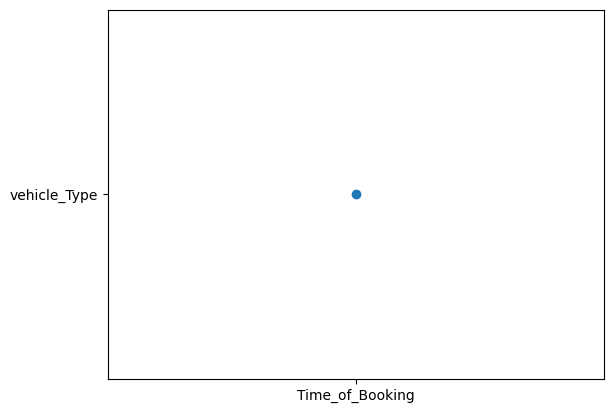

In [9]:
plt.scatter(x='Time_of_Booking', y='vehicle_Type')

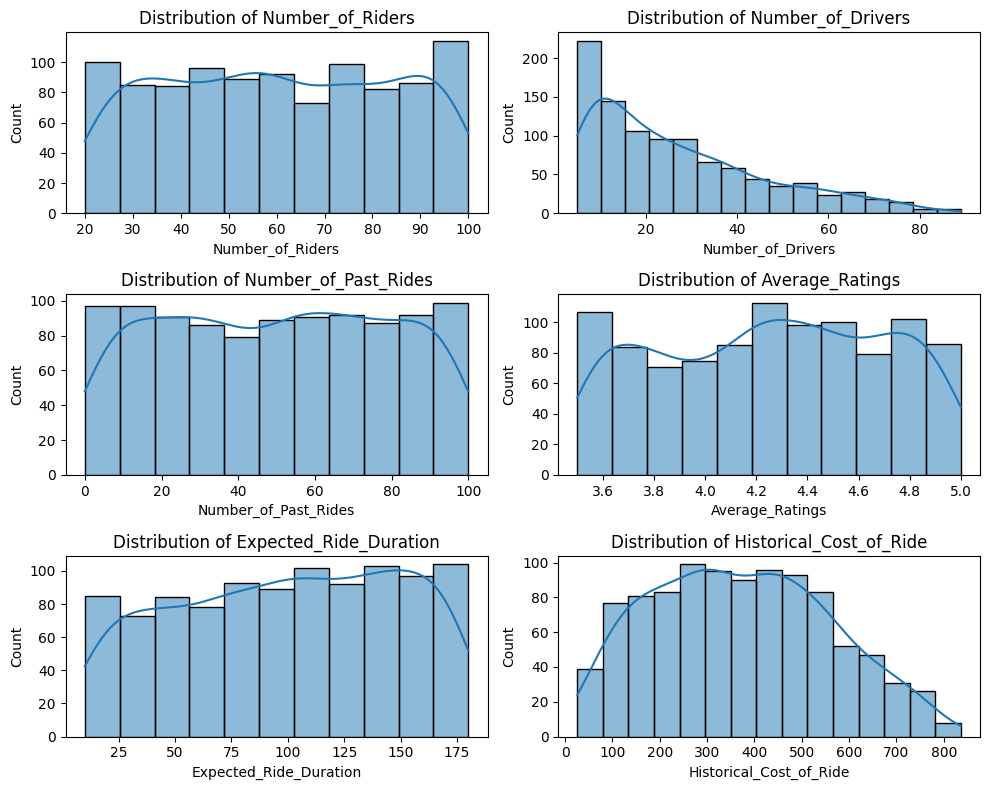

In [10]:
#UNIVARIATE ANALYSIS

# Plot histogram for numeric variables
numeric_columns = ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 
                   'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']

plt.figure(figsize=(10, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


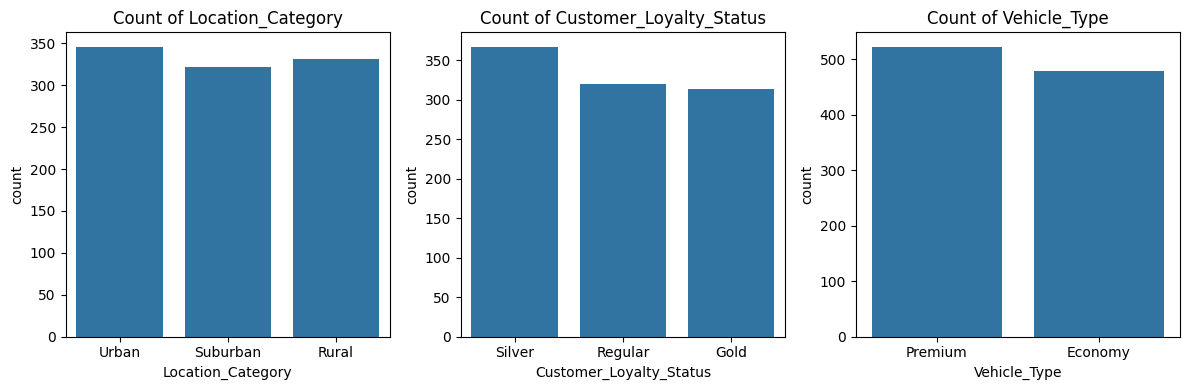

In [11]:
# Plot bar plots for categorical variables
categorical_columns = ['Location_Category', 'Customer_Loyalty_Status', 'Vehicle_Type']

plt.figure(figsize=(12, 4))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()


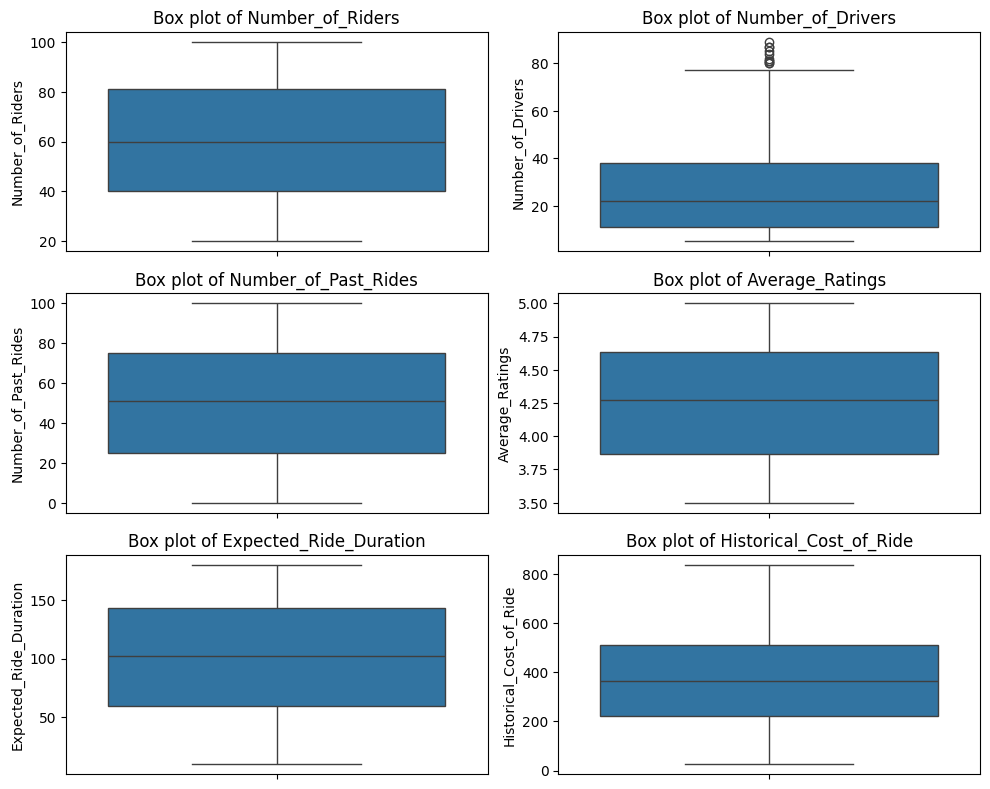

In [12]:
# Box plot for numeric variables
plt.figure(figsize=(10, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()


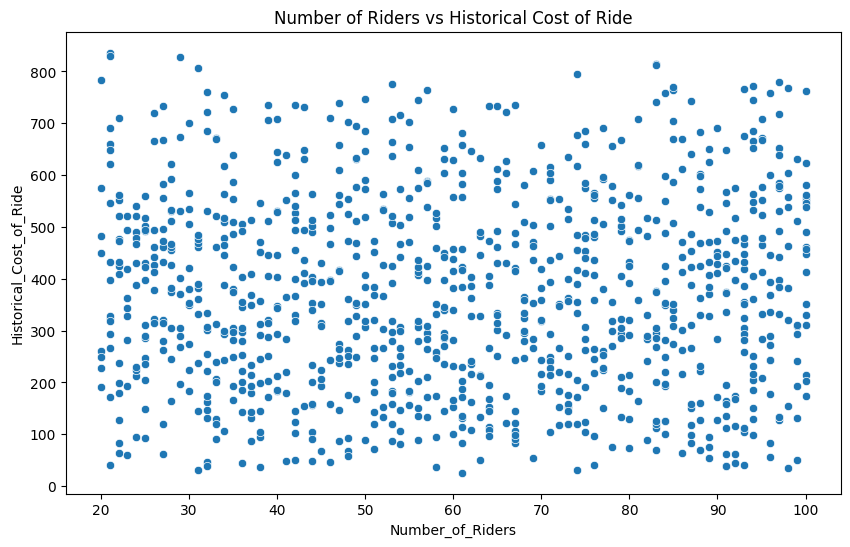

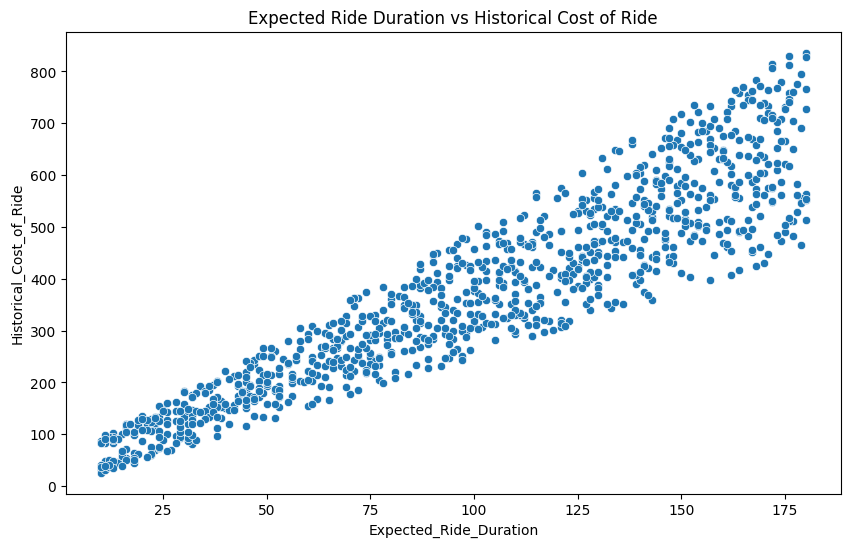

In [13]:
# Scatter plot for numerical variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number_of_Riders', y='Historical_Cost_of_Ride', data=df)
plt.title('Number of Riders vs Historical Cost of Ride')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Expected_Ride_Duration', y='Historical_Cost_of_Ride', data=df)
plt.title('Expected Ride Duration vs Historical Cost of Ride')
plt.show()


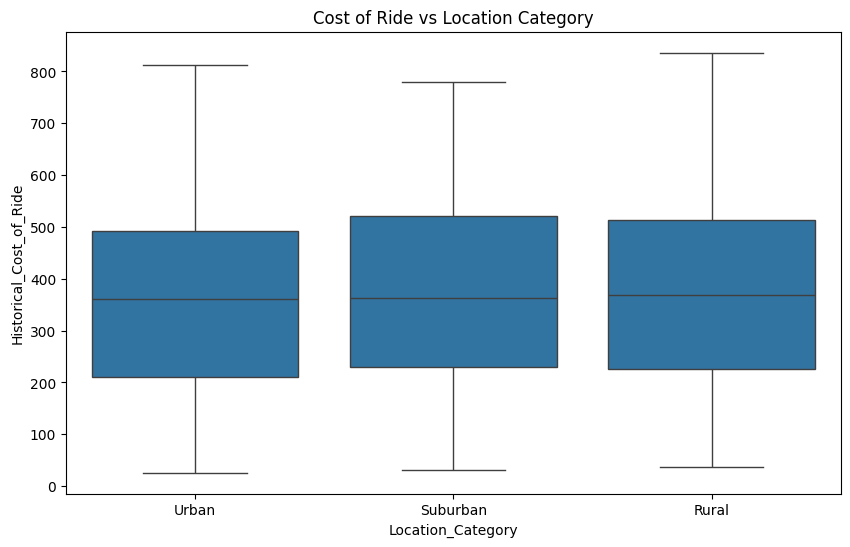

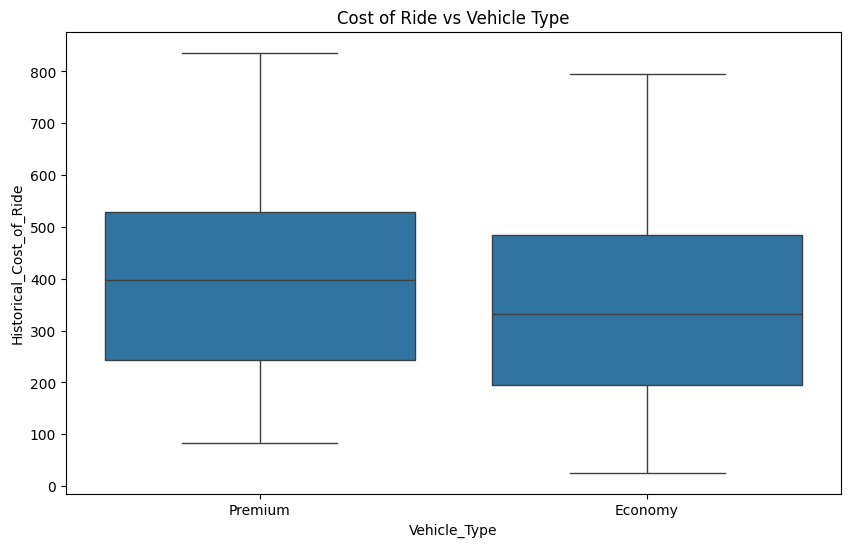

In [14]:
# Box plot for categorical vs numeric
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location_Category', y='Historical_Cost_of_Ride', data=df)
plt.title('Cost of Ride vs Location Category')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle_Type', y='Historical_Cost_of_Ride', data=df)
plt.title('Cost of Ride vs Vehicle Type')
plt.show()


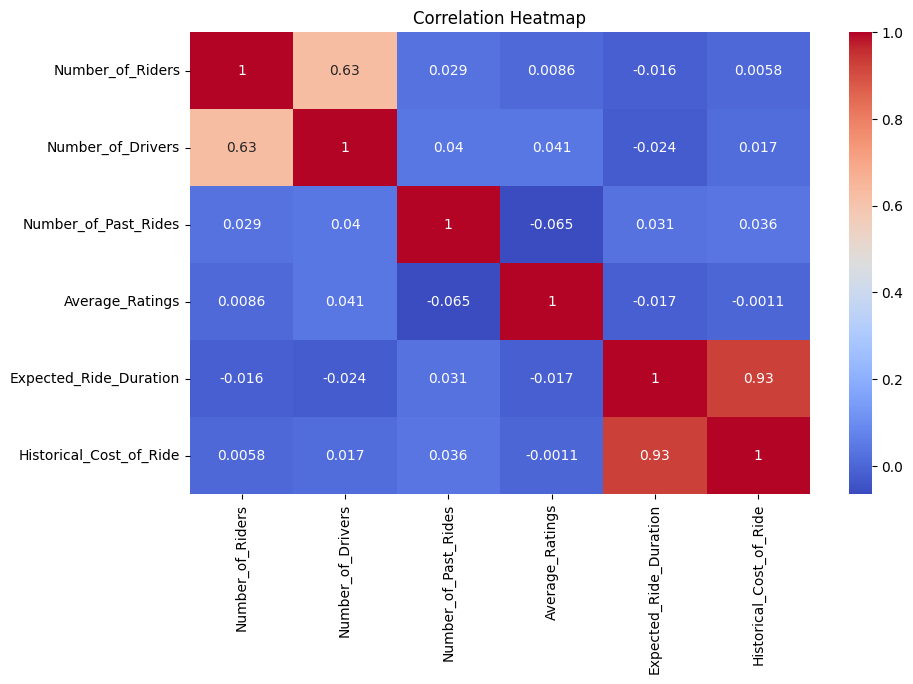

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


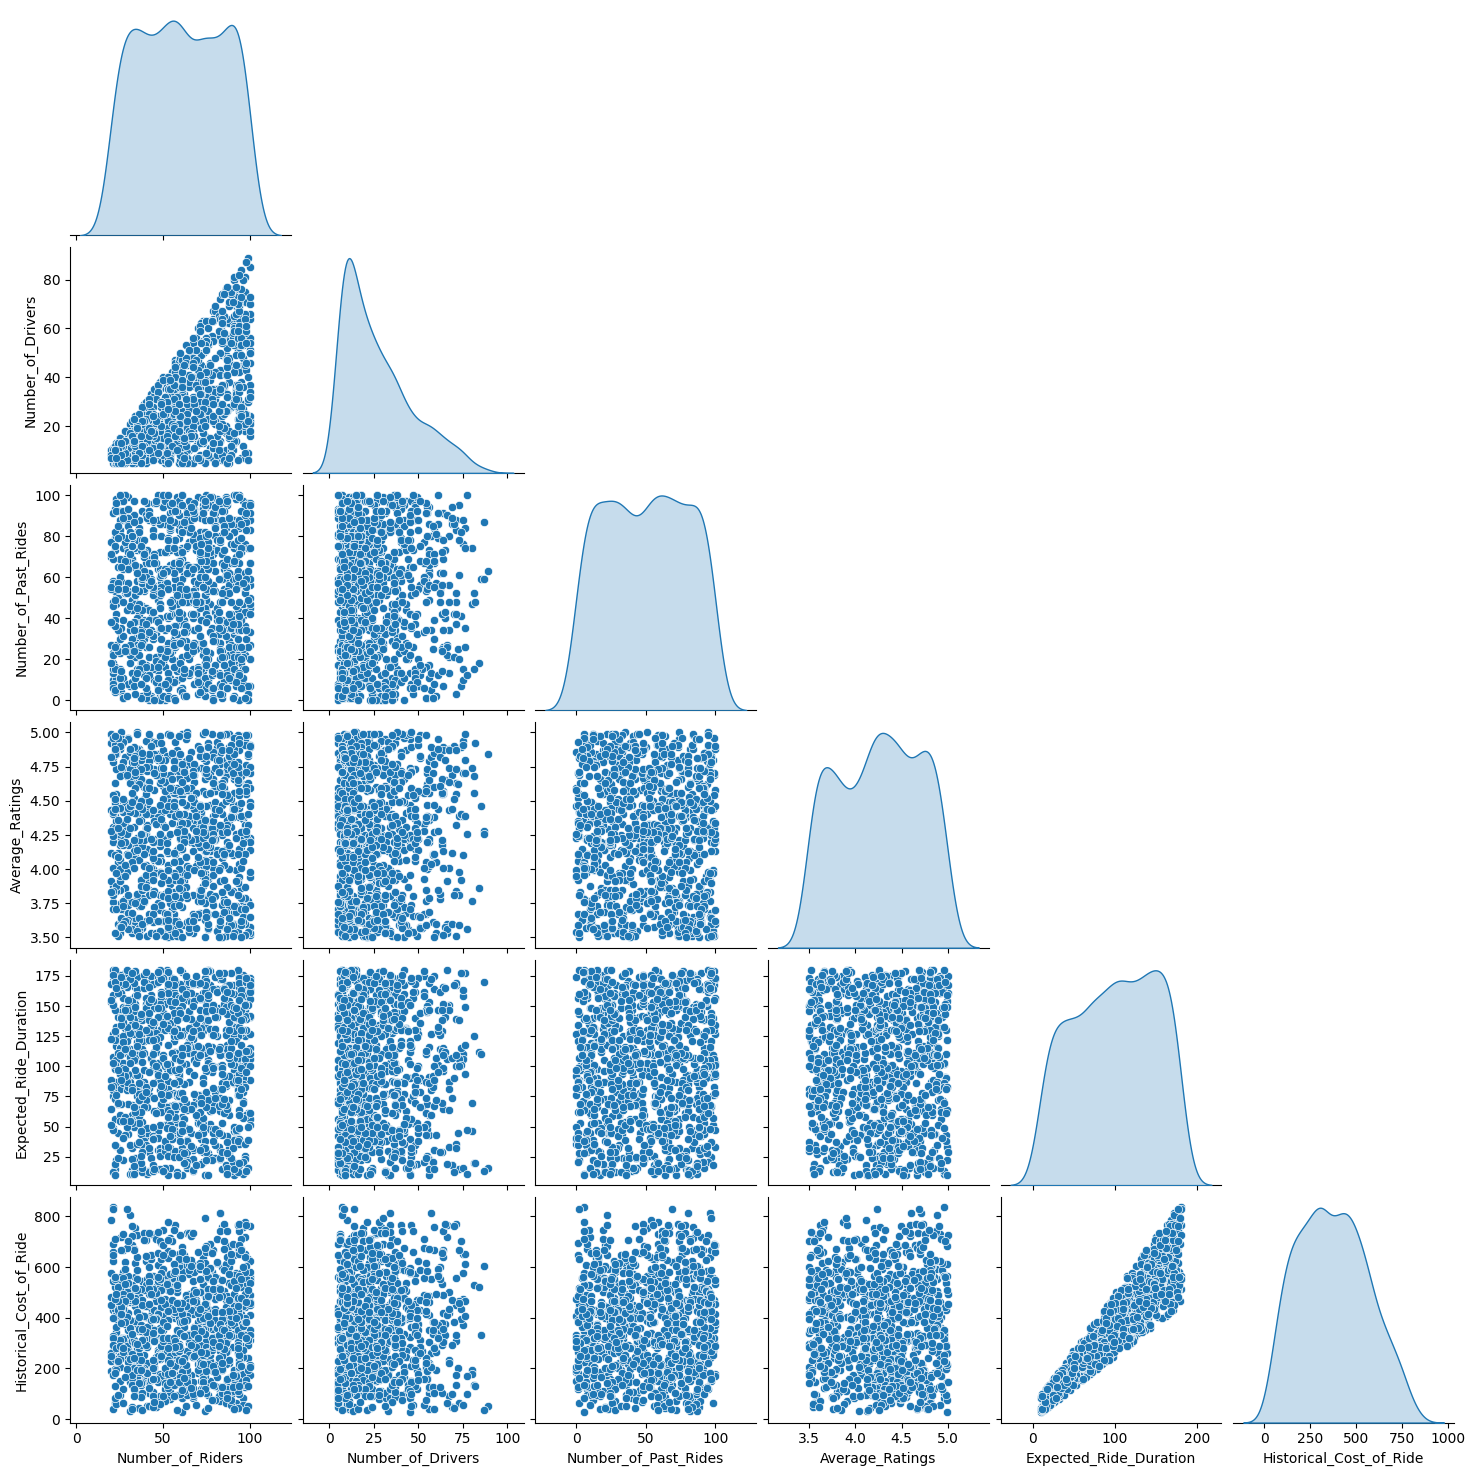

In [16]:
# Pair plot for multivariate numeric analysis
sns.pairplot(df[numeric_columns], corner=True, diag_kind="kde")
plt.show()


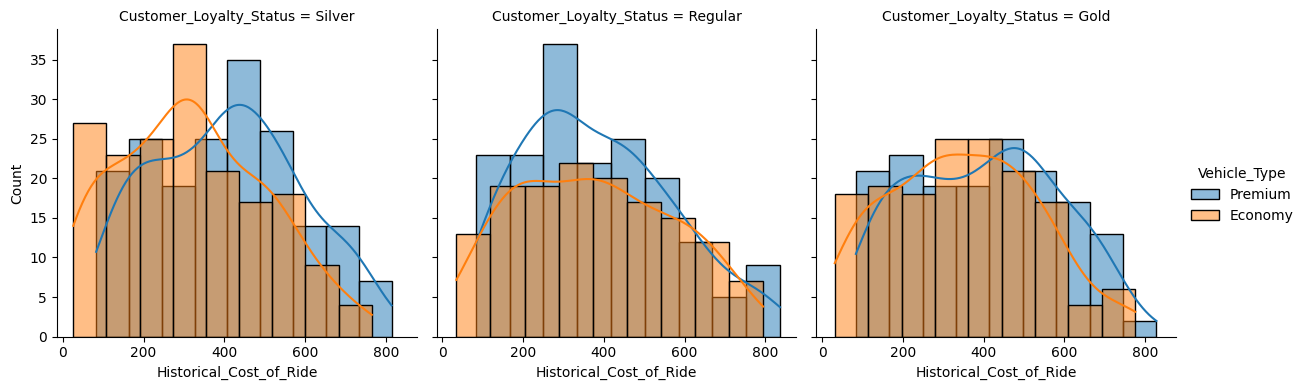

In [17]:
# FacetGrid for multivariate analysis
g = sns.FacetGrid(df, col="Customer_Loyalty_Status", hue="Vehicle_Type", height=4)
g.map(sns.histplot, "Historical_Cost_of_Ride", kde=True)
g.add_legend()
plt.show()


In [20]:
import plotly.express as px

# 3D scatter plot for multivariate analysis
fig = px.scatter_3d(df, x='Number_of_Riders', y='Historical_Cost_of_Ride', z='Expected_Ride_Duration',
                    color='Vehicle_Type', size='Historical_Cost_of_Ride', title='3D Scatter Plot')
fig.show()
import plotly.express as px



In [19]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [21]:
import plotly.express as px

# Interactive scatter matrix for numeric variables
fig = px.scatter_matrix(df, dimensions=numeric_columns, color='Vehicle_Type',
                        title="Scatter Matrix of Numeric Features",
                        labels={col: col.replace('_', ' ') for col in numeric_columns})

# Update layout for better readability
fig.update_layout(width=900, height=800, title_x=0.5)
fig.show()



In [22]:
import plotly.graph_objs as go
import numpy as np

# Correlation matrix
corr_matrix = df[numeric_columns].corr().values
heatmap_data = go.Heatmap(
    z=corr_matrix,
    x=numeric_columns,
    y=numeric_columns,
    colorscale='Viridis',
    hoverongaps=False
)

# Create a layout and plot it
layout = go.Layout(
    title='Interactive Correlation Heatmap',
    xaxis_nticks=36,
    yaxis_nticks=36
)
fig = go.Figure(data=[heatmap_data], layout=layout)
fig.show()


In [23]:
# Create an animated scatter plot for Historical Cost of Ride over Time_of_Booking
fig = px.scatter(df, x="Time_of_Booking", y="Historical_Cost_of_Ride", 
                 animation_frame="Time_of_Booking", 
                 color="Vehicle_Type",
                 size="Historical_Cost_of_Ride", 
                 hover_name="Location_Category", 
                 title="Dynamic Pricing Over Time",
                 labels={'Time_of_Booking': 'Booking Time', 'Historical_Cost_of_Ride': 'Ride Cost'})

fig.update_layout(width=800, height=600, title_x=0.5)
fig.show()


In [24]:
# Sunburst plot for hierarchical analysis
fig = px.sunburst(df, path=['Customer_Loyalty_Status', 'Vehicle_Type', 'Location_Category'], 
                  values='Historical_Cost_of_Ride', 
                  color='Historical_Cost_of_Ride',
                  color_continuous_scale='RdBu',
                  title="Sunburst Plot of Ride Cost by Customer Loyalty, Vehicle Type, and Location")
fig.update_layout(width=800, height=600, title_x=0.5)
fig.show()


In [25]:
# 3D scatter plot with Plotly
fig = px.scatter_3d(df, x='Number_of_Riders', y='Expected_Ride_Duration', z='Historical_Cost_of_Ride',
                    color='Vehicle_Type', size='Historical_Cost_of_Ride',
                    hover_name='Location_Category',
                    title='3D Interactive Plot of Riders, Duration, and Cost')
fig.update_layout(width=900, height=800, title_x=0.5)
fig.show()


In [26]:
# Parallel coordinates plot
fig = px.parallel_coordinates(df, dimensions=['Number_of_Past_Rides', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride'],
                              color='Historical_Cost_of_Ride', color_continuous_scale=px.colors.diverging.Tealrose,
                              title="Parallel Coordinates Plot for Pricing Features")
fig.update_layout(width=900, height=600, title_x=0.5)
fig.show()


ERROR: Could not find a version that satisfies the requirement goteh (from versions: none)
ERROR: No matching distribution found for goteh
Note: you may need to restart the kernel to use updated packages.
